Members:  
Khizer Tariq-----367409    
Syed Usman Ali Shah-----386543   
Wasam Khan-----370080 

In [149]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

Read the Image

In [150]:
image = cv2.imread("input.png")

Display the Image

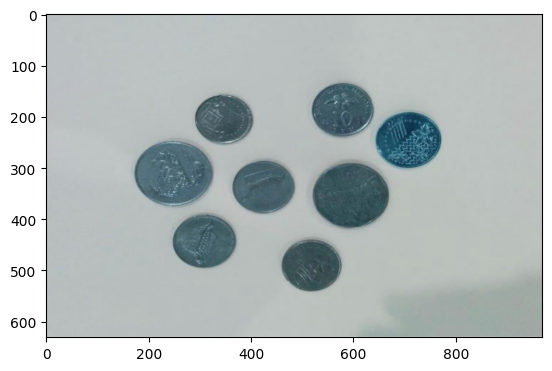

In [151]:
plt.imshow(image)

Check the Image Type

In [152]:
height, width, channels = image.shape

if channels == 1:
    print("Grayscale Image")
elif channels == 3:
    print("RGB Image")
elif channels == 4:
    print("RGBA Image")
else:
    print("Unknown Image Type")

RGB Image


Task1: Image Resizing

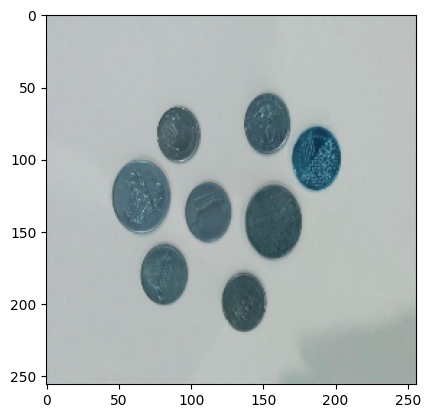

In [153]:
resized_image = cv2.resize(image, (256, 256))
plt.imshow(resized_image)

Task 2: RGB to Grayscale Conversion

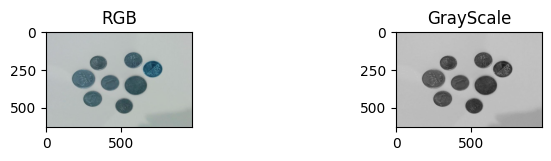

In [154]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(131),plt.imshow(image),plt.title("RGB")
plt.subplot(133),plt.imshow(gray_image,cmap='gray'),plt.title("GrayScale")
plt.show()

Task 3: RGB to Binary Conversion

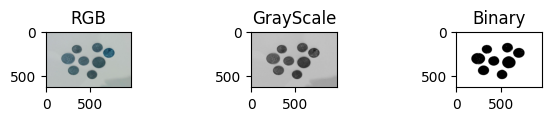

In [155]:
ret,thresh = cv2.threshold(gray_image,160,255,0)
plt.subplot(151),plt.imshow(image),plt.title("RGB")
plt.subplot(153),plt.imshow(gray_image,cmap='gray'),plt.title("GrayScale")
plt.subplot(155),plt.imshow(thresh,cmap='gray'),plt.title("Binary")
plt.show()

Coin Counting and Segmentation

Coins in the image :  8


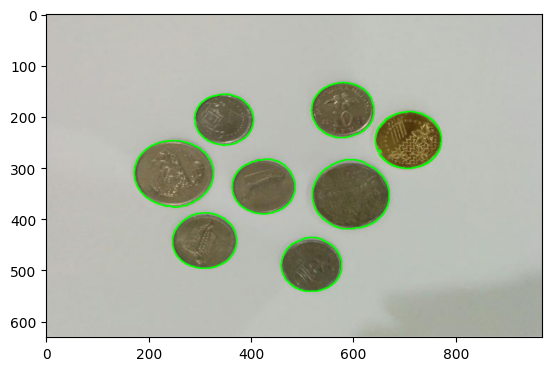

In [156]:
blur = cv2.GaussianBlur(thresh,(11,11),0)
canny = cv2.Canny(blur, 30, 150, 3)
(cnt, hierarchy) = cv2.findContours(
canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
min_contour_area = 35
filtered_contours = [contour for contour in cnt if cv2.contourArea(contour) > min_contour_area]
cv2.drawContours(rgb, filtered_contours, -1, (0, 255, 0), 2)
plt.imshow(rgb)
print("Coins in the image : ", len(filtered_contours))
